### Hypothesis testing
#### Mini project II
Elements of Data Science

In [30]:
import numpy as np
from datascience import *

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Hypothesis Testing

#### Create differences Test statistic 


In [32]:
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]

In [ ]:
sample_array = make_array(1.0, 1.5,1.4, 1.2, 2.0, 1.8)

In [ ]:
positive = np.count_nonzero(diff_n(sample_array, 2)>0)
positive

In [ ]:
negative = np.count_nonzero(diff_n(sample_array, 2) < 0)
negative

In [ ]:
positive - negative

In [33]:
def changes(rates, years = 1):
    "Return the number of increases minus the number of decreases after two years."
    differences = diff_n(rates, years)  
    positives = np.count_nonzero(differences > 0)
    negatives = np.count_nonzero(differences < 0) 
    return positives - negatives  

### Berkeley Earth High Resolution data

In [ ]:
berkdata = "data/Global_TAVG_monthly.csv"

In [ ]:
bd = Table().read_table(berkdata)
bd.show(2)

In [ ]:
bd.plot("Year","Monthly")

In [ ]:
bd.where("Month",12).scatter("Year","Monthly")
plt.title("Berkeley Earth High Res Glabal Data: December")

In [ ]:
bd.where("Month",9).scatter("Year","Monthly")
plt.title("Berkeley Earth High Res Glabal Data: September")

In [ ]:
september_temp = bd.where("Month",9).column("Monthly")

In [ ]:
changes(september_temp,2)

In [ ]:
december_temp = bd.where("Month",12).column("Monthly")

In [ ]:
np.sum(diff_n(december_temp, 2)>0)

In [ ]:
np.count_nonzero(diff_n(december_temp, 2)<0)

In [ ]:
december_temp = bd.where("Month",12).column("Monthly")

In [ ]:
changes(december_temp,2)

In [ ]:
len(december_temp)

In [ ]:
def sim_null(num=173):
    tchance = np.random.choice(["Increase","Decrease"],num)
    inc = np.sum(tchance=="Increase")
    dec = np.sum(tchance=="Decrease")
    return inc-dec

In [ ]:
sim_null()

In [ ]:
sample = []
for i in np.arange(15000):
    sample.append(sim_null(173))
plt.hist(sample, label='null distribution', bins = np.arange(-50,50,2),color='yellow',alpha=0.4, edgecolor='black', linewidth=1.2)
plt.scatter(changes(september_temp,2),0, s=300, label='test statistic',marker='o', 
            c='red',alpha=0.8, edgecolors='blue')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.title('September Temperature Changes')
plt.show()

In [ ]:
np.count_nonzero(np.array(sample)>17)/len(sample)

In [ ]:
len(sample)

In [ ]:
bd_annual = bd.group('Year', np.average)
#bd_annual.plot("Year","Monthly average")
bd_annual

In [ ]:
changes(bd_annual.column("Monthly average"),2)

In [ ]:
np.count_nonzero(np.array(sample)>22)/len(sample)

In [ ]:
sample = []
for i in np.arange(15000):
    sample.append(sim_null(173))
plt.hist(sample, label='null distribution', bins = np.arange(-50,50,2),color='yellow',alpha=0.4, edgecolor='black', linewidth=1.2)
plt.scatter(changes(bd_annual.column("Monthly average"),2),0, s=300, label='test statistic',marker='o', 
            c='red',alpha=0.8, edgecolors='blue')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.title('Annual Temperature Changes')
plt.text(75, 250, 'p-value 0.048', color = "black")
plt.show()

### Inference and biodiversity recovery

In [34]:
# Plot description dataset
datafile = "../Mini-II/data/MSH_PLOT_DESCRIPTORS2.csv"
MSH_PLOT = Table.read_table(datafile)
MSH_PLOT.where('PLOT_CODE','TORD10')

PLOT_NAME,PLOT_CODE,FIRST_YEAR,LAST_YEAR,UTMGRID,UTMEAST,UTMNORTH,LONG,LAT,POT._RAD.,HEAT_LOAD,ELEVATION(M),ASPECT,SLOPE,IMPACT_TYPE,SUCCESSION_TYPE
Toutle Ridge10,TORD10,1981,1996,10T,559724,5118180,122.226,46.2146,0.769,0.796,1430,N,11,Blast edge,Secondary


In [ ]:
np.unique(MSH_PLOT['PLOT_CODE'])

In [ ]:
MSH_PLOT = MSH_PLOT.with_columns('NLONG',-1*(MSH_PLOT.column('LONG')))
MSH_map = MSH_PLOT.select('LAT', 'NLONG', 'PLOT_CODE').relabel('PLOT_CODE', 'labels')
Circle.map_table(MSH_map, color='blue',area=200)

In [35]:
datafile = "../Mini-II/data/MSH_STRUCTURE_PLOT_YEAR.csv"
MSH_YEAR = Table.read_table(datafile)
MSH_YEAR.show(2)

PLOT_ID,PLOT_NAME,PLOT_NUMBER,YEAR,RICHNESS,COVER_%,HPRIME,EVENNESS,FREQUENCY
ABPL011995,ABPL,1,1995,14,2.2,2.41,0.913,7.7
ABPL011996,ABPL,1,1996,17,2.9,2.524,0.891,8.1


In [ ]:
np.unique(MSH_YEAR['PLOT_NAME'])

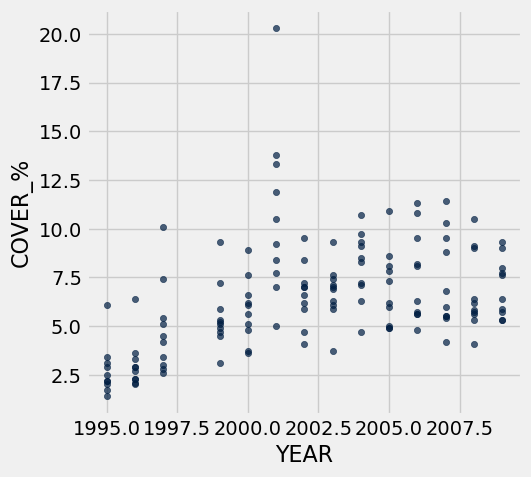

In [36]:
MSH_YEAR.where('PLOT_NAME','ABPL').scatter("YEAR","COVER_%")

In [37]:
MSH_YEAR.where('PLOT_NAME','ABPL').group("YEAR",np.mean)

YEAR,PLOT_ID mean,PLOT_NAME mean,PLOT_NUMBER mean,RICHNESS mean,COVER_% mean,HPRIME mean,EVENNESS mean,FREQUENCY mean
1995,,,5.5,14.1,2.75,2.2426,0.8533,6.7
1996,,,5.5,15.4,3.05,2.3348,0.8591,8.19
1997,,,5.5,17.4,4.85,2.2334,0.7871,10.01
1999,,,5.5,18.2,5.52,2.2438,0.7754,9.93
2000,,,5.5,16.9,5.82,2.0752,0.7351,8.64
2001,,,5.5,17.8,10.71,1.9739,0.6895,11.9
2002,,,5.5,17.9,6.66,2.0938,0.7287,12
2003,,,5.5,19,6.73,2.2543,0.772,14.43
2004,,,5.5,18.5,8.09,2.1048,0.729,15.44
2005,,,5.5,15,6.97,2.0314,0.7583,14.86


(1995.0, 2010.0)

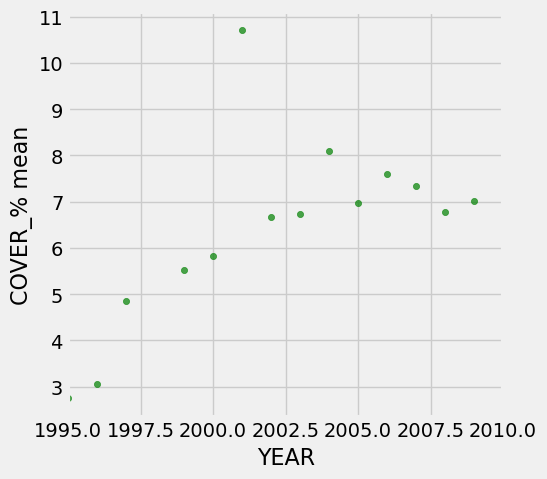

In [38]:
MSH_YEAR.where('PLOT_NAME','ABPL').group("YEAR",np.mean).scatter("YEAR", "COVER_% mean",  label='ABPL data Cover %', color='green')
plt.xlim(1995,2010)

In [39]:
COVER_APBL = MSH_YEAR.where('PLOT_NAME','ABPL').group("YEAR",np.mean).column("COVER_% mean")
changes(COVER_APBL,1)

5

In [40]:
def simulate_under_null(num_chances_to_change):
    uniform = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
    sample = uniform.sample_from_distribution('Chance', num_chances_to_change)     
    increases = sample.column("Chance sample").item(0) 
    decreases = sample.column("Chance sample").item(1)  
    return increases - decreases  

In [ ]:
uniform = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
uniform.sample_from_distribution('Chance', 13)  

In [41]:
def empirical_distribution(tbl,iterations):
    num_changes = tbl.num_rows -1
    samples = make_array()
    for i in np.arange(iterations):
        samples = np.append(samples, simulate_under_null(num_changes)) 
    Table().with_column('Test statistic under null', samples).hist(bins=np.arange(min(samples), max(samples) + max(samples) , 2))
    return samples

In [42]:
APBL_group = MSH_YEAR.where('PLOT_NAME','ABPL').group("YEAR",np.mean)
changes(APBL_group.column('COVER_% mean'))


5

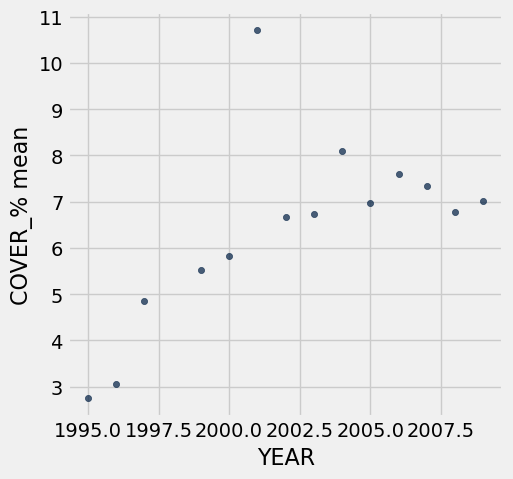

In [43]:
APBL_group.scatter('YEAR', 'COVER_% mean')

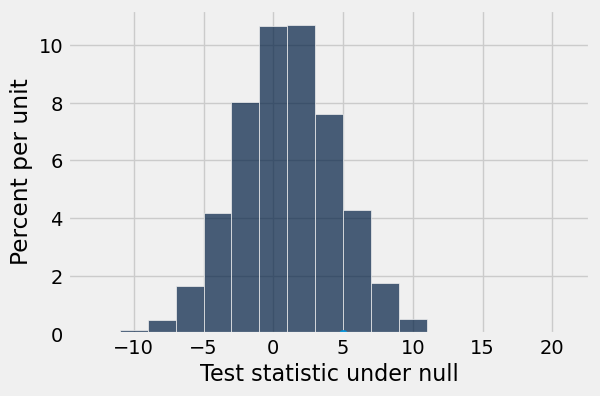

In [44]:
samples = empirical_distribution(APBL_group,10000)
plt.scatter(5,0)

In [45]:
tstatistic = changes(APBL_group.column('COVER_% mean'))
tstatistic

5

In [46]:
pvalue = np.count_nonzero(samples >= tstatistic)/len(samples)
pvalue

0.1319

## More detailed plot

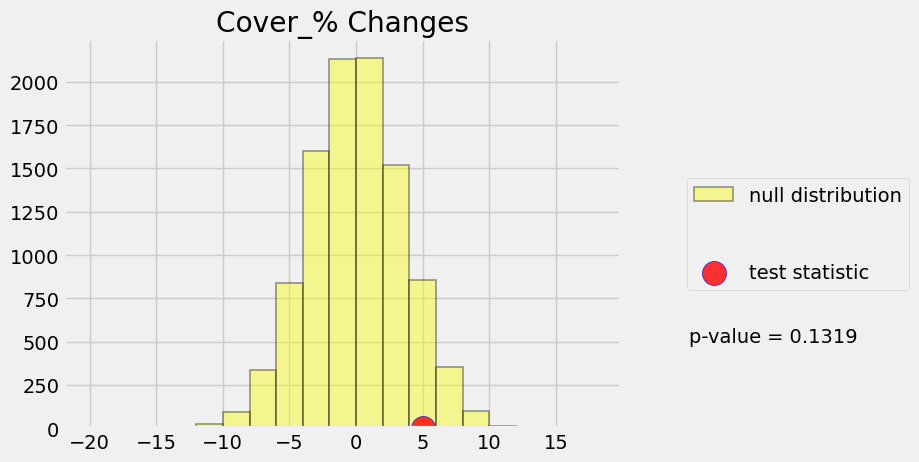

In [51]:
plt.hist(samples, label='null distribution', bins = np.arange(-20,20,2),color='yellow',alpha=0.4, edgecolor='black', linewidth=1.2)
plt.scatter(tstatistic,0, s=300, label='test statistic',marker='o', 
            c='red',alpha=0.8, edgecolors='blue')
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
plt.title('Cover_% Changes')
plt.text(25, 500, 'p-value = '+str(pvalue), color = "black")
plt.show()

In [ ]:
MSH_YEAR.where('PLOT_NAME','STRD').group("YEAR",np.mean)

In [ ]:
changes(MSH_YEAR.where('PLOT_NAME','STRD').group("YEAR",np.mean).column('RICHNESS mean'))

In [ ]:
empirical_distribution(MSH_YEAR.where('PLOT_NAME','STRD'),10000)